In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from urllib.parse import urlparse
import spacy

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('./datasets/comics_reddit.csv')
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,"Weekly Discussion Thread: Comics, TV, and More...",Hey there honorary Justice League members - it...,DCcomics,16,0.84
1,Dead Boy Detectives Megathread,# [***Dead Boy Detectives***](https://m.media-...,DCcomics,12,0.80
2,[Comic Excerpt] Tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96
3,[Comic Excerpt] Bros really thought they could...,NaN,DCcomics,65,0.90
4,"[Discussion] It’s Donna Troy’s birthday, say s...",Artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99


In [29]:
df.shape

(2891, 5)

In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df.shape

(2526, 5)

Removing duplicate posts reduces the dataframe from 2,891 records to 2,526 records

In [32]:
df['subreddit'].value_counts()

subreddit
DCcomics    1290
Marvel      1236
Name: count, dtype: int64

In [33]:
df['subreddit'].value_counts(normalize = True)

subreddit
DCcomics    0.510689
Marvel      0.489311
Name: proportion, dtype: float64

In [34]:
df.groupby('subreddit').mean('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio
0,DCcomics,71.815504,0.739264
1,Marvel,211.073625,0.746926


In [35]:
df.groupby('subreddit').median('up_votes').reset_index()

,subreddit,up_votes,up_vote_ratio
0,DCcomics,13.0,0.82
1,Marvel,10.0,0.83


### There is a big difference in the mean on upvotes, but not in the median. Should investigate the distribution of upvotes.

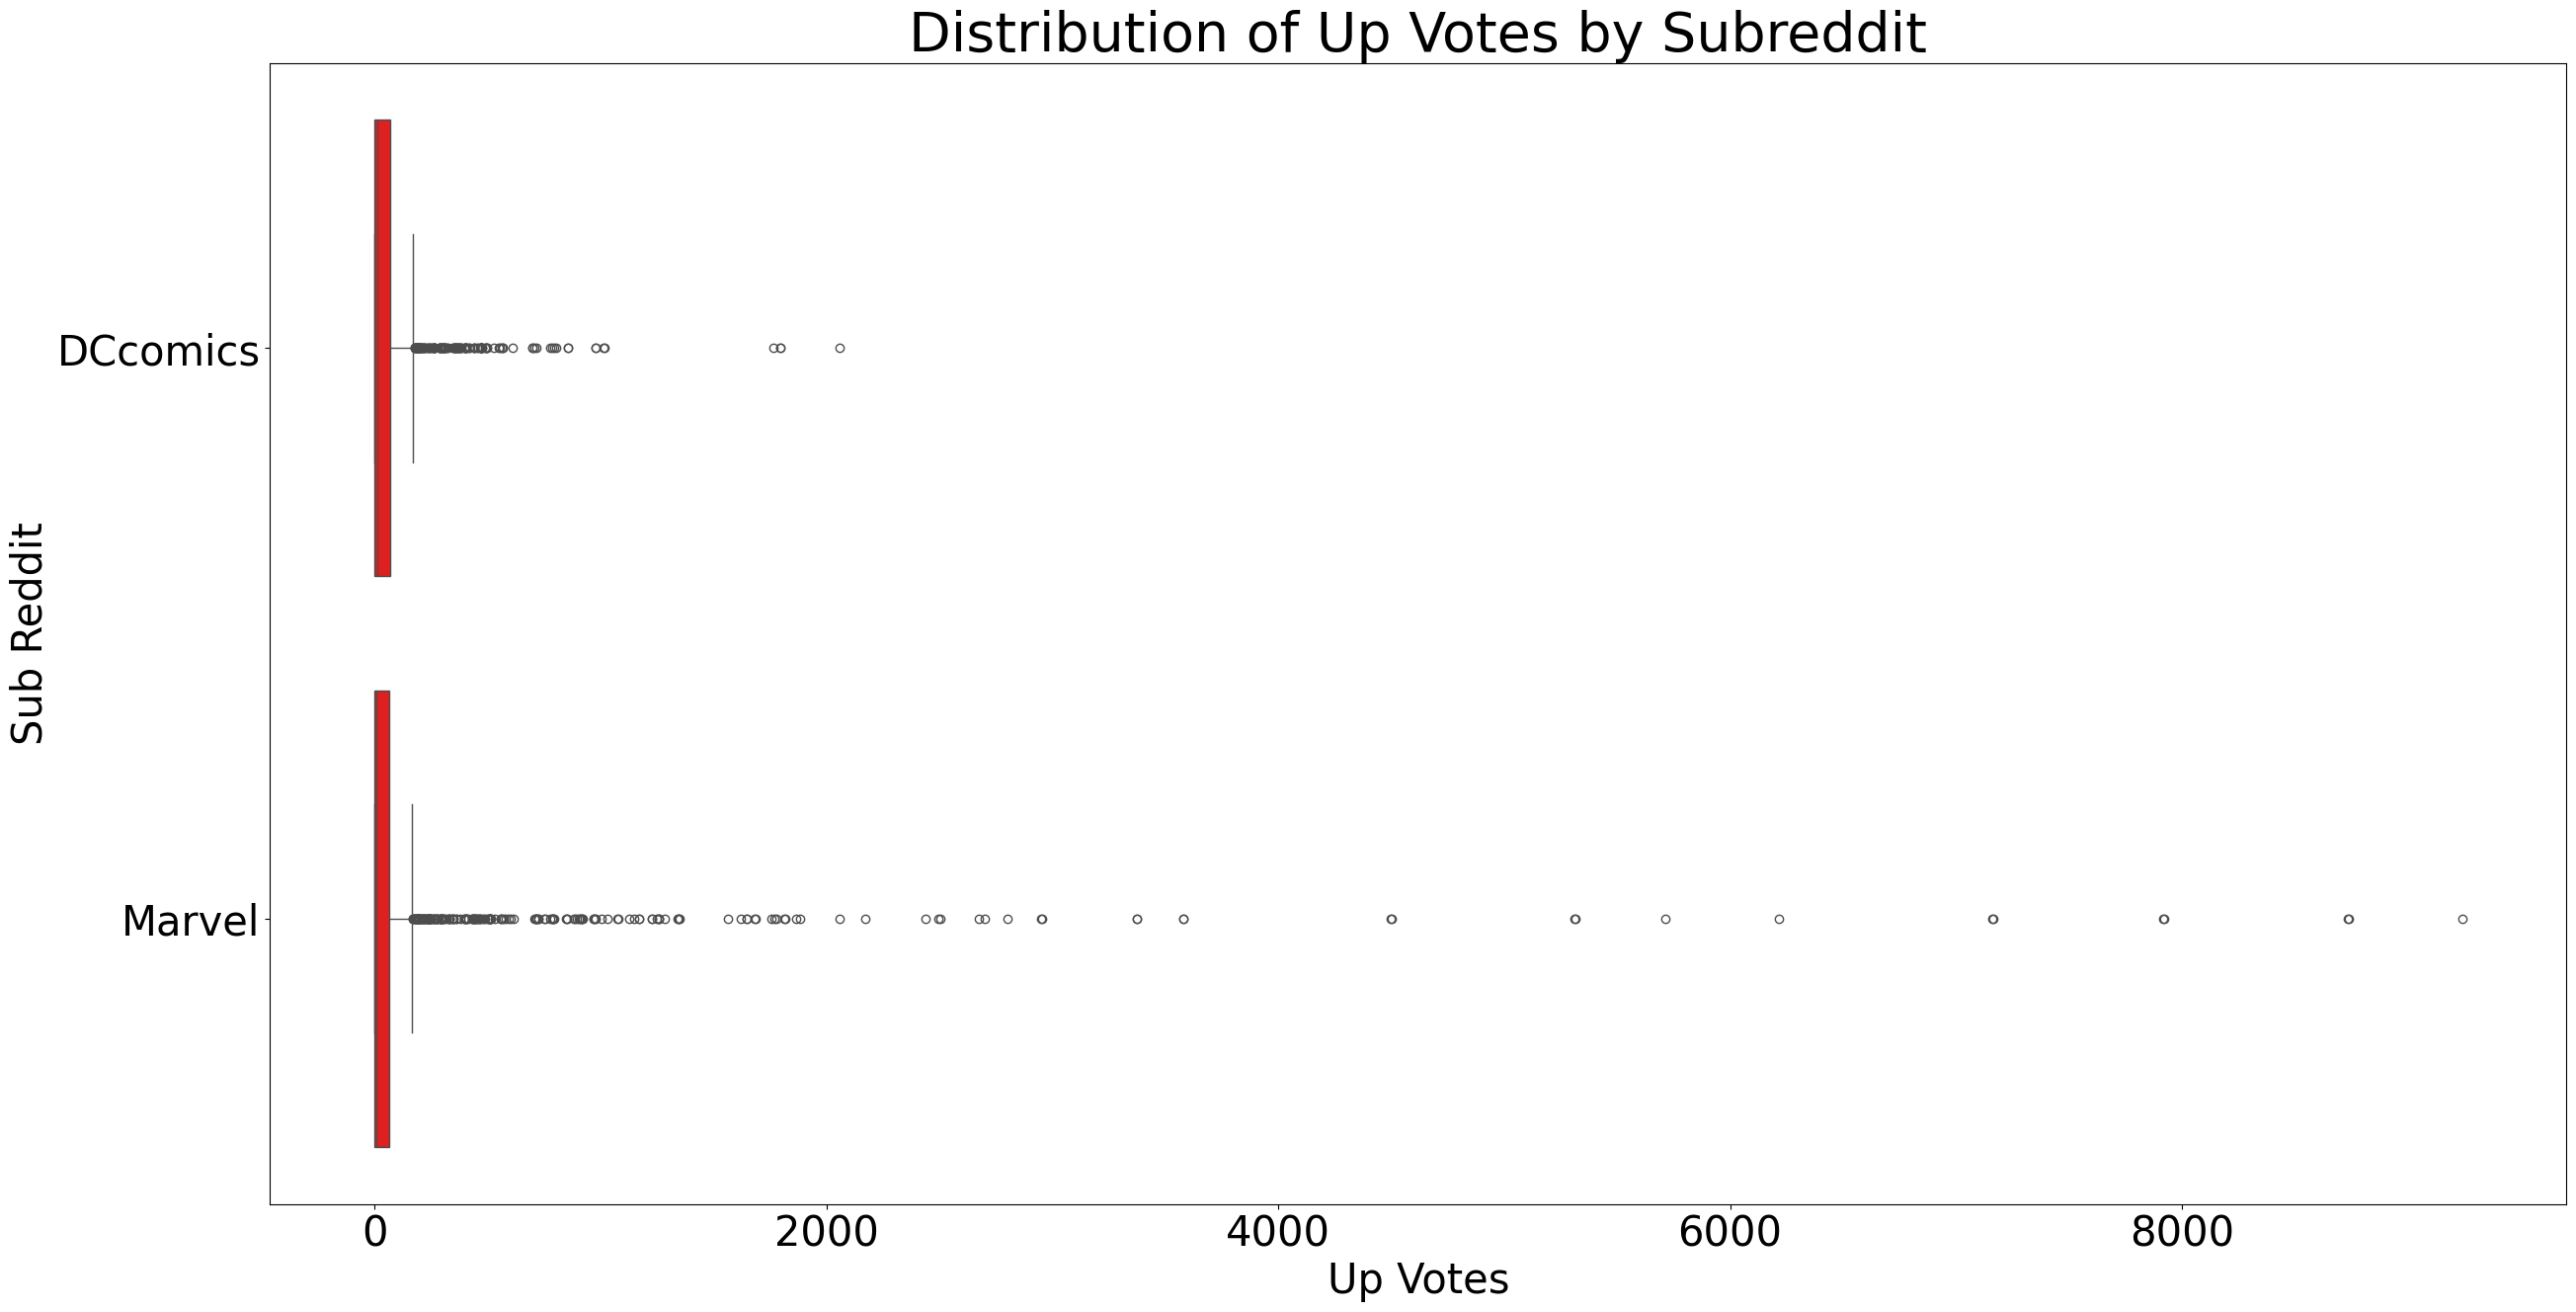

In [36]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['up_votes'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Up Votes by Subreddit', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Up Votes', size = 30)
plt.ylabel('Sub Reddit', size = 30);

plt.savefig('../project-3/images/up_vote_distribution_by_subreddit', dpi = 192)

In [37]:
# Not how I'm looking for the mean vs median

# fig, ax1 = plt.subplots(figsize = (10,10))

# ax2 = ax1.twinx()

# bar_container = ax1.bar(mean_up_votes_df['subreddit'], mean_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'red')
# bar_container2 = ax1.bar(median_up_votes_df['subreddit'], median_up_votes_df['up_votes'], label = 'Mean Up Votes', color = 'blue')

In [38]:
grouped = df.groupby('subreddit')[['up_votes', 'up_vote_ratio']].agg(['mean', 'median']).reset_index()
grouped

subreddit    up_votes        up_vote_ratio       
                   mean median          mean median
0  DCcomics   71.815504   13.0      0.739264   0.82
1    Marvel  211.073625   10.0      0.746926   0.83

In [39]:
# Deleting column names
grouped.columns = [''] * len(grouped.columns)

#Then creating new column names
colnames = ['subreddit', 'up_votes_mean', 'up_votes_median', 'up_votes_ratio_mean', 'up_votes_ratio_median']

#Then adding the column names back in
grouped.columns = colnames
grouped

,subreddit,up_votes_mean,up_votes_median,up_votes_ratio_mean,up_votes_ratio_median
0,DCcomics,71.815504,13.0,0.739264,0.82
1,Marvel,211.073625,10.0,0.746926,0.83


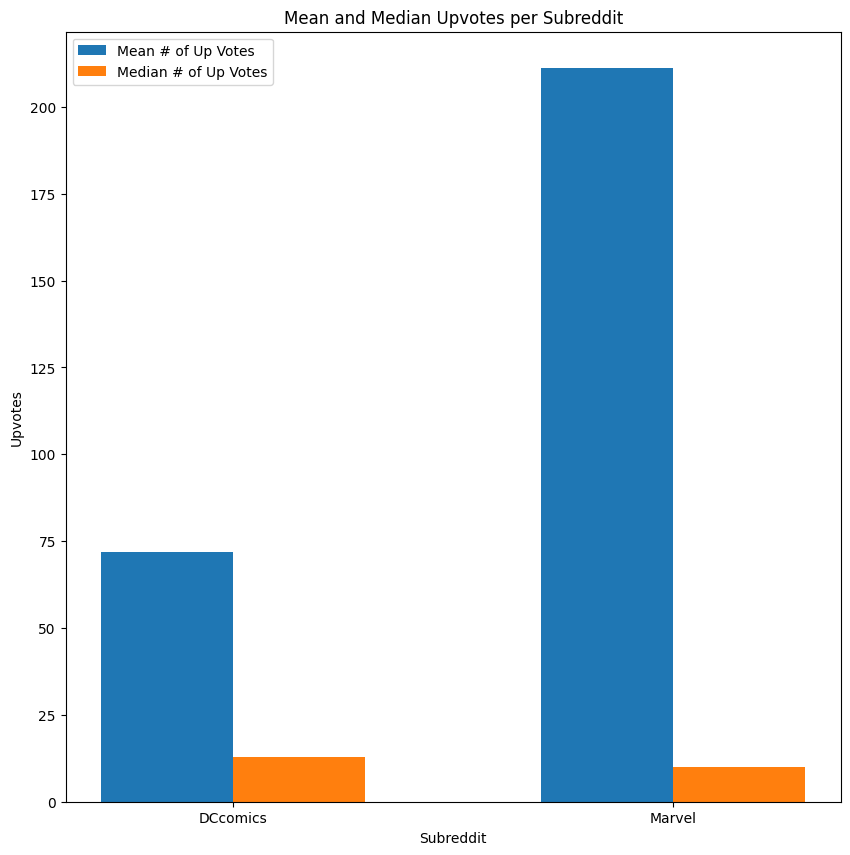

In [40]:
# Had ChatGPT's help with this
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes')
plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes')

plt.xlabel('Subreddit')
plt.ylabel('Upvotes')
plt.title('Mean and Median Upvotes per Subreddit')
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'])
plt.legend();

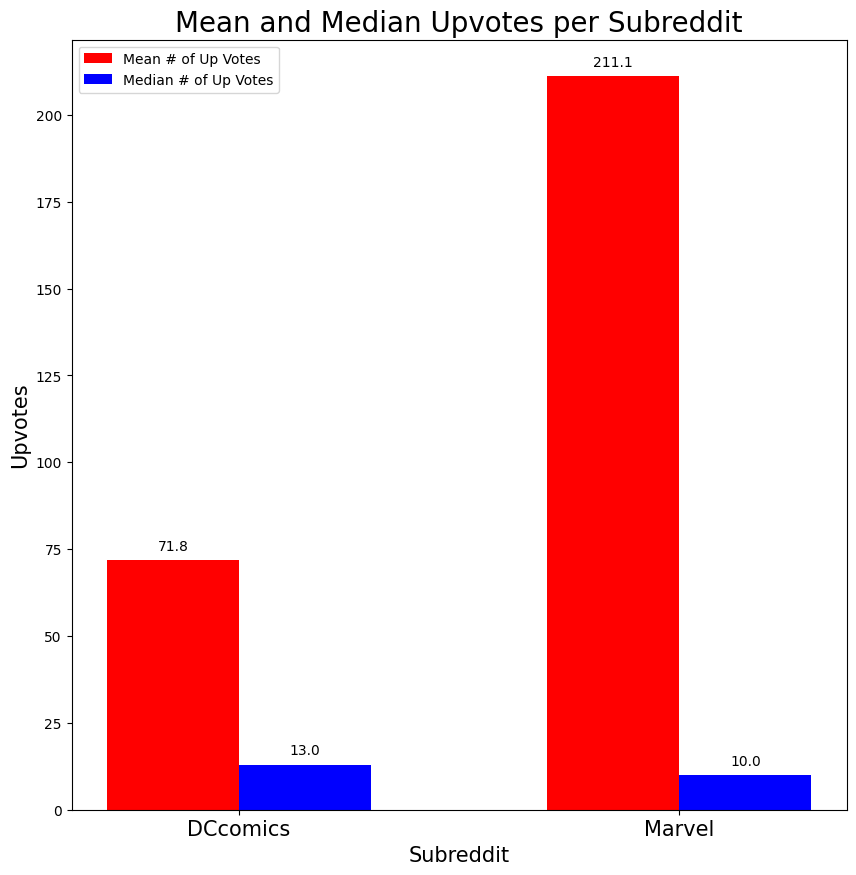

In [41]:
# Now adding the labels onto the data
plt.figure(figsize = (10, 10))

bar_width = 0.3

positions = range(len(grouped))

#Plotting mean values with labels
bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'red')
for i, bar in enumerate(bars_mean):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
             f'{grouped["up_votes_mean"][i]:.1f}',
             ha = 'center', va = 'bottom')

#Plotting median values with labels
bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'blue')
for i, bar in enumerate(bars_median):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{grouped["up_votes_median"][i]:.1f}',
             ha = 'center', va = 'bottom')

plt.xlabel('Subreddit', size = 15)
plt.ylabel('Upvotes', size = 15)
plt.title('Mean and Median Upvotes per Subreddit', size = 20)
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)
plt.legend();

In [42]:
# Couldn't figure out how to add mean up vote ratio onto this chart with dual axis and have it appear on the correct axis in height

# #Adding in the Up Vote Percentage
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax2 = ax1.twinx()

# bar_width = 0.3

# # This is 2 - since there's 2 rows in this data frame (for Marvel & DC)
# positions = range(len(grouped))

# #Plotting mean values with labels
# bars_mean = plt.bar(positions, grouped['up_votes_mean'], bar_width, label = 'Mean # of Up Votes', color = 'lightcoral')
# for i, bar in enumerate(bars_mean):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
#              f'{grouped["up_votes_mean"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting median values with labels
# bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_median'], bar_width, label = 'Median # of Up Votes', color = 'darkred')
# for i, bar in enumerate(bars_median):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_median"][i]:.1f}',
#              ha = 'center', va = 'bottom')

# #Plotting Mean_Up_Vote_Ratio
#                 #Making this on ratio #2
# bars_mean_ratio = ax2.bar([p + bar_width *2 for p in positions], grouped['up_votes_ratio_mean'], bar_width, label = 'Mean Up Vote Ratio', color = 'blue')
# for i, bar in enumerate(bars_mean_ratio):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_ratio_mean"][i]:.3f}',
#              ha = 'center', va = 'bottom' )

# plt.xlabel('Subreddit', size = 15)
# ax1.set_ylabel('Up Vote Ratio', color = 'blue', size = 15)
# ax2.set_ylabel('Number of Up Votes', color = 'red', size = 15)
# plt.title('Up Votes per Subreddit')
# plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)
# plt.legend();

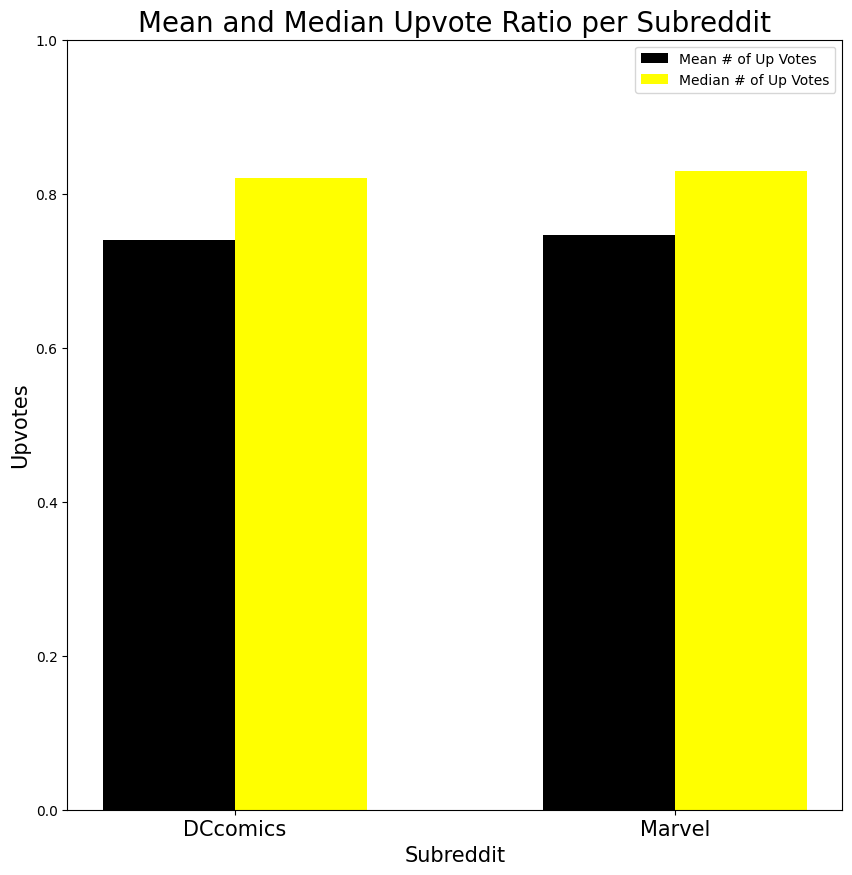

In [43]:
#Up Vote Ratio

plt.figure(figsize = (10, 10))
ax = plt.gca()

bar_width = 0.3

positions = range(len(grouped))

#Plotting mean values with labels
bars_mean = plt.bar(positions, grouped['up_votes_ratio_mean'], bar_width, label = 'Mean # of Up Votes', color = 'black')
# for i, bar in enumerate(bars_mean):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, 
#              f'{grouped["up_votes_ratio_mean"][i]:.1f}',
#              ha = 'center', va = 'bottom')

#Plotting median values with labels
bars_median = plt.bar([p + bar_width for p in positions], grouped['up_votes_ratio_median'], bar_width, label = 'Median # of Up Votes', color = 'yellow')
# for i, bar in enumerate(bars_median):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
#              f'{grouped["up_votes_ratio_median"][i]:.1f}',
#              ha = 'center', va = 'bottom')

plt.xlabel('Subreddit', size = 15)
plt.ylabel('Upvotes', size = 15)
plt.title('Mean and Median Upvote Ratio per Subreddit', size = 20)
plt.xticks([p + bar_width / 2 for p in positions], grouped['subreddit'], size = 15)
ax.set_ylim([0, 1]) # Set the max y axis to 1 so that the legend and charts don't overlap https://stackoverflow.com/questions/3777861/how-to-set-the-axis-limits
plt.legend();

### Making everything lower case

In [44]:
df['title'] = df['title'].str.lower()
df['post'] = df['post'].str.lower()

In [45]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84
1,dead boy detectives megathread,# [***dead boy detectives***](https://m.media-...,DCcomics,12,0.80
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99


### Removing URLs from title and post

In [46]:
#Where ]( are together create a space so I can find each URL
df['post'] = df['post'].str.replace('](', '] (')
df['title'] = df['title'].str.replace('](', '] (')

In [47]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99


In [48]:
def remove_urls(texts):
    nlp = spacy.load('en_core_web_md') #Calling Spacy object in beginning of function
    list_of_new_posts = [] #Empty list of new posts
    
    for i in texts.index:
        text = texts[i]

        if pd.notnull(text):
            non_url_words = []
            text2 = nlp(text)
        
            for token in text2:
                if not token.like_url and not token.is_punct and not token.text == "n't":
                    #If it's not a URL, punctuation or "n't" (since not is a stop word), append it to the empty list of non-url-words
                    non_url_words.append(token.text)
            
            non_url_words

            new_post = ' '.join(x for x in non_url_words)
            list_of_new_posts.append(new_post)

        #If it is null, append an empty string to the list
        else:
            list_of_new_posts.append('')
        
    return list_of_new_posts
        #' '.join(x for x in non_url_words) #Take the empty list of not_url_words and join them with spaces

In [49]:
df['clean_title'] = remove_urls(df['title'])
df['clean_post'] = remove_urls(df['post'])

In [50]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist


### Adding length of titles and posts based on initial title / post length

In [51]:
df['title_length'] = df['title'].str.len()
df['post_length'] = df['post'].str.len()

In [52]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,NaN
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,NaN
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0


In [53]:
# get the number of words in title : https://stackoverflow.com/questions/46429033/how-do-i-count-the-total-number-of-words-in-a-pandas-dataframe-cell-and-add-thos
df['title_word_count'] = df['title'].str.count(' ') + 1
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length,title_word_count
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0,17
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0,4
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,NaN,13
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,NaN,20
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0,10


In [54]:
# Get the number of words in the posts
df['post_word_count'] = df['post'].str.count(' ') +1
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length,title_word_count,post_word_count
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0,17,355.0
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0,4,132.0
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,NaN,13,NaN
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,NaN,20,NaN
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0,10,2.0


### Nearly half of the data does not have any words

In [55]:
df.isnull().sum()

title                  0
post                1323
subreddit              0
up_votes               0
up_vote_ratio          0
clean_title            0
clean_post             0
title_length           0
post_length         1323
title_word_count       0
post_word_count     1323
dtype: int64

In [56]:
df['post_length'].fillna(0, inplace = True)
df['post_word_count'].fillna(0, inplace = True)
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length,title_word_count,post_word_count
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0,17,355.0
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0,4,132.0
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,0.0,13,0.0
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,0.0,20,0.0
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0,10,2.0


In [57]:
df.isnull().sum()

title                  0
post                1323
subreddit              0
up_votes               0
up_vote_ratio          0
clean_title            0
clean_post             0
title_length           0
post_length            0
title_word_count       0
post_word_count        0
dtype: int64

### Create a dummy column for does this post have text or not

In [58]:
df['post_has_text'] = np.where(df['post_word_count'] == 0, 0, 1)
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length,title_word_count,post_word_count,post_has_text
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0,17,355.0,1
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0,4,132.0,1
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,0.0,13,0.0,0
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,0.0,20,0.0,0
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0,10,2.0,1


In [62]:
# The mean and median title and post word count
df.groupby('subreddit')[['title_word_count', 'post_word_count']].agg(['mean', 'median']).reset_index()

subreddit title_word_count        post_word_count       
                        mean median            mean median
0  DCcomics        10.833333    9.0       51.748837    3.5
1    Marvel        10.543689    9.0       30.021036    0.0

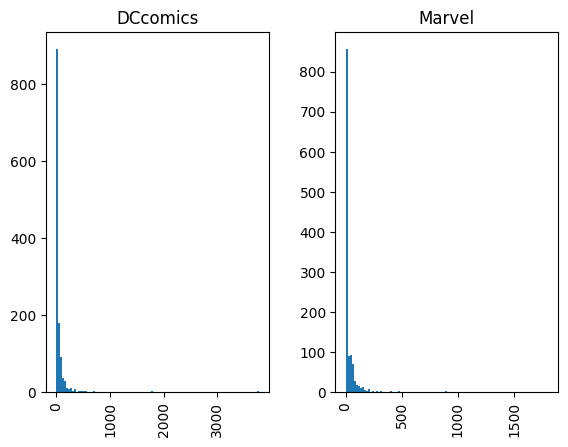

In [59]:
df.hist('post_word_count', by = 'subreddit', bins = 100);

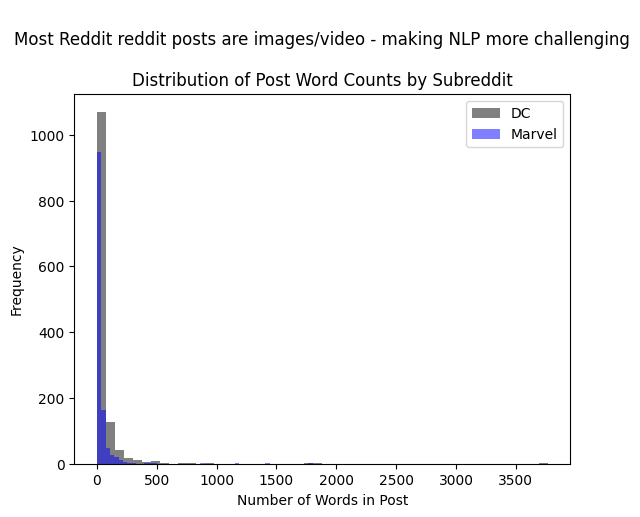

In [60]:
dc_word_count = pd.DataFrame(df[df['subreddit'] == 'DCcomics']['post_word_count'])
marvel_word_count = pd.DataFrame(df[df['subreddit'] == 'Marvel']['post_word_count'])

plt.hist(dc_word_count['post_word_count'], color = 'grey', label = 'DC', bins = 50)
plt.hist(marvel_word_count['post_word_count'], color = 'blue', label = 'Marvel', bins = 50, alpha = 0.5)

plt.title('\nMost Reddit reddit posts are images/video - making NLP more challenging\n\nDistribution of Post Word Counts by Subreddit')
plt.xlabel('Number of Words in Post')
plt.ylabel('Frequency')

plt.savefig('../project-3/images/post_word_counts_by_subreddit', dpi = 192)

plt.legend();


In [61]:
dc_word_freq = dc_word_count['post_word_count'].value_counts()
dc_word_percent = dc_word_freq / len(dc_word_count)
dc_word_freq_df = pd.DataFrame( {'Frequency' : dc_word_freq, 'Percentage' : dc_word_percent} )
dc_word_freq_df = dc_word_freq_df.reset_index().sort_values('post_word_count')
dc_word_freq_df

,post_word_count,Frequency,Percentage
0,0.0,611,0.473643
2,1.0,16,0.012403
57,2.0,4,0.003101
3,3.0,14,0.010853
99,4.0,2,0.001550
...,...,...,...
150,798.0,1,0.000775
142,940.0,1,0.000775
92,1801.0,2,0.001550
152,1818.0,1,0.000775


In [62]:
marvel_word_freq = marvel_word_count['post_word_count'].value_counts()
marvel_word_percent = marvel_word_freq / len(marvel_word_count)
marvel_word_freq_df = pd.DataFrame( {'Frequency' : marvel_word_freq, 'Percentage' : marvel_word_percent} )
marvel_word_freq_df = marvel_word_freq_df.reset_index().sort_values('post_word_count')
marvel_word_freq_df

,post_word_count,Frequency,Percentage
0,0.0,712,0.576052
23,1.0,7,0.005663
21,2.0,7,0.005663
51,3.0,4,0.003236
1,4.0,12,0.009709
...,...,...,...
120,472.0,1,0.000809
85,891.0,2,0.001618
112,1177.0,1,0.000809
107,1419.0,1,0.000809


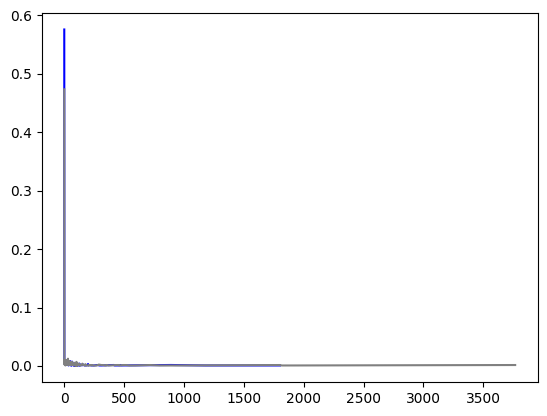

In [63]:
plt.plot(marvel_word_freq_df['post_word_count'],
         marvel_word_freq_df['Percentage'],
         color = 'blue')

plt.plot(dc_word_freq_df['post_word_count'],
         dc_word_freq_df['Percentage'],
         color = 'grey');


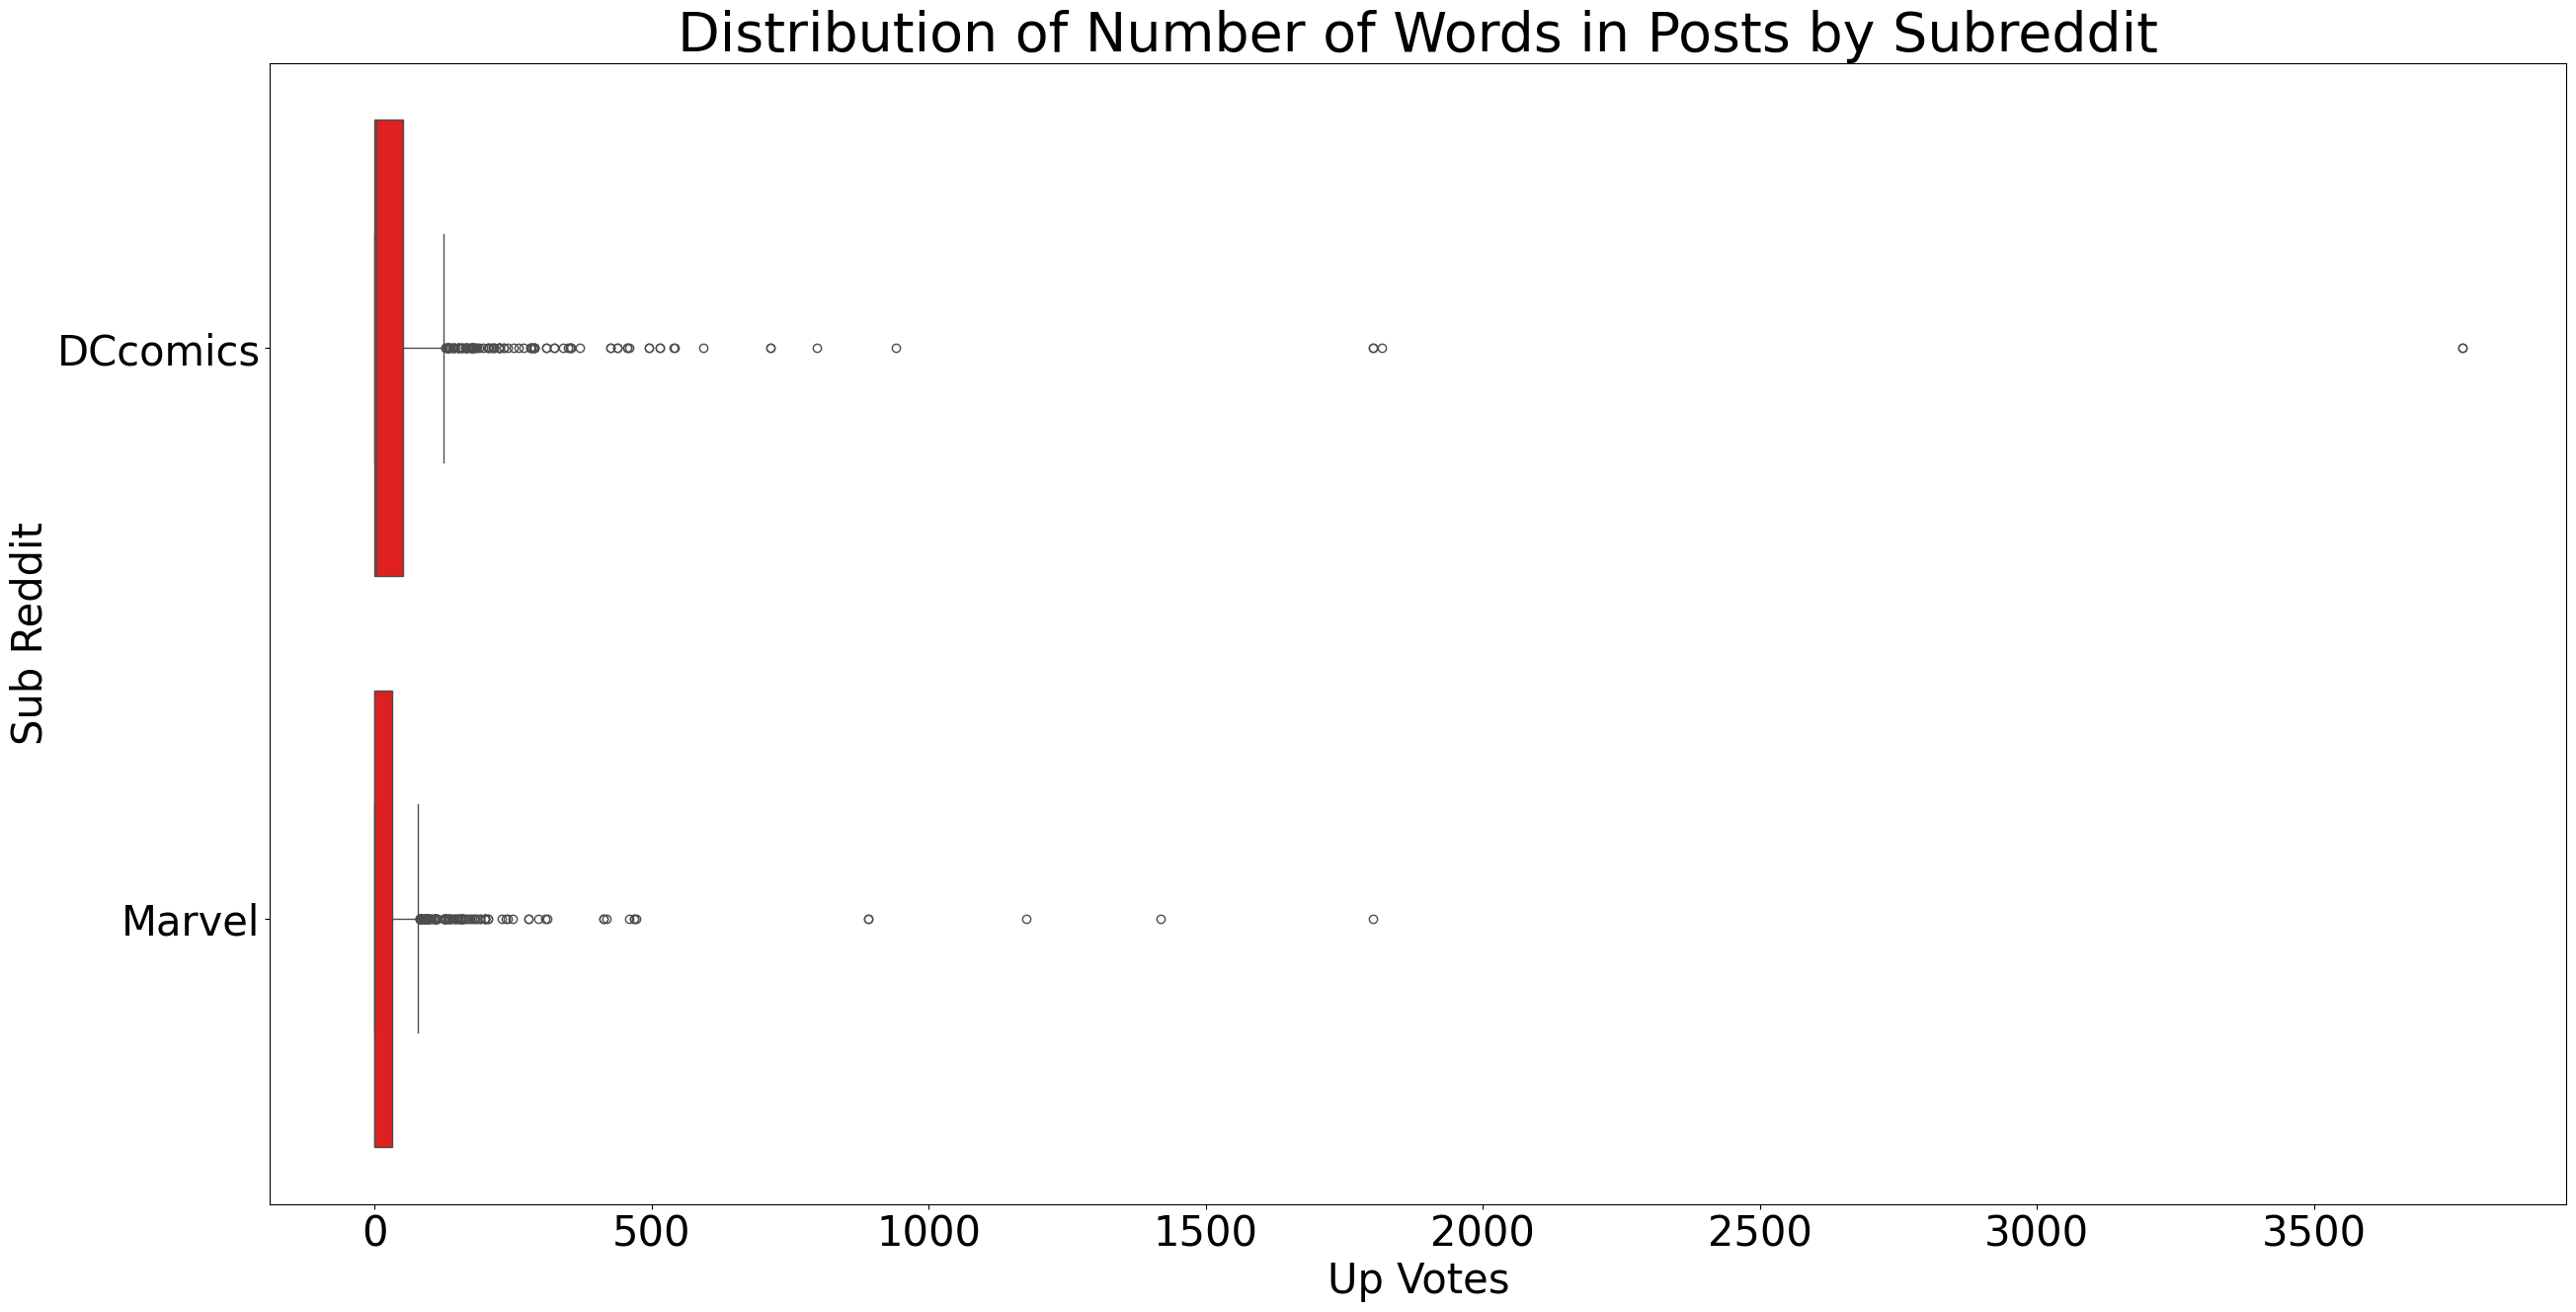

In [64]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['post_word_count'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Number of Words in Posts by Subreddit', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Up Votes', size = 30)
plt.ylabel('Sub Reddit', size = 30);

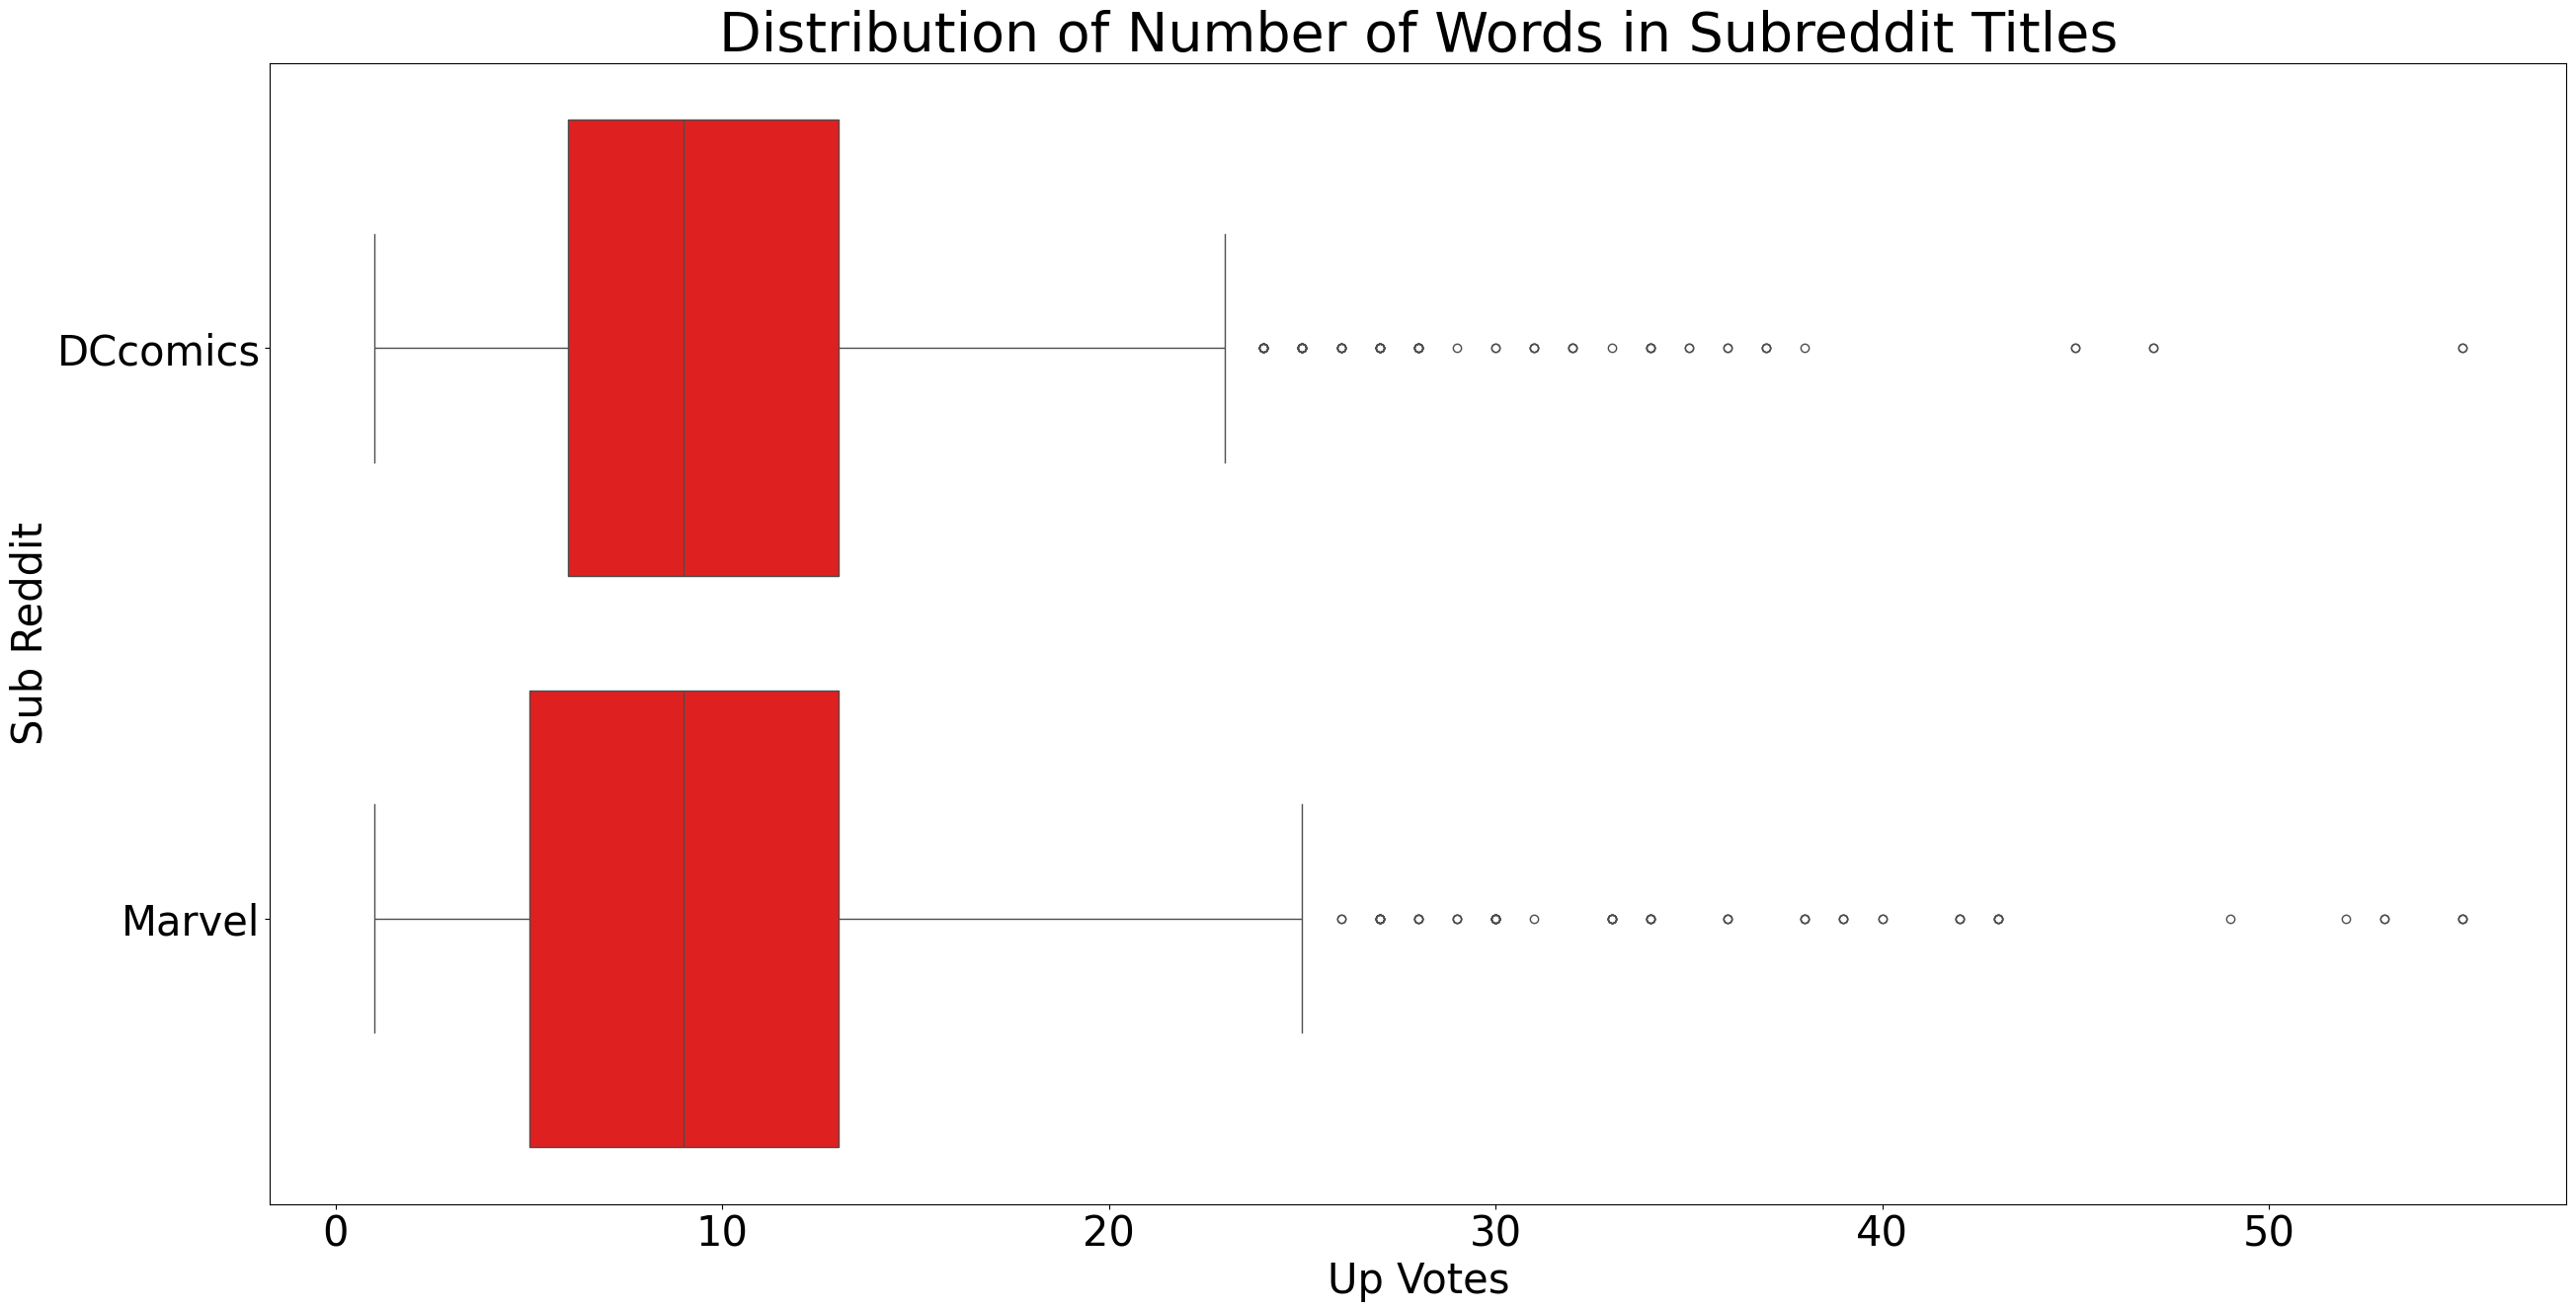

In [70]:
plt.figure(figsize = (30, 15))

sns.boxplot(x = df['title_word_count'],
            y = df['subreddit'], color = 'red')

plt.title('Distribution of Number of Words in Subreddit Titles', size = 40)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.xlabel('Up Votes', size = 30)
plt.ylabel('Sub Reddit', size = 30)

plt.savefig('../project-3/images/word_in_subreddit_titles', dpi = 192);

In [65]:
df.head()

,title,post,subreddit,up_votes,up_vote_ratio,clean_title,clean_post,title_length,post_length,title_word_count,post_word_count,post_has_text
0,"weekly discussion thread: comics, tv, and more...",hey there honorary justice league members - it...,DCcomics,16,0.84,weekly discussion thread comics tv and more ap...,hey there honorary justice league members it ’...,98,4827.0,17,355.0,1
1,dead boy detectives megathread,# [***dead boy detectives***] (https://m.media...,DCcomics,12,0.80,dead boy detectives megathread,dead boy detectives \n\n time date april 25 20...,30,1957.0,4,132.0,1
2,[comic excerpt] tim realizes he's fallen in lo...,NaN,DCcomics,470,0.96,comic excerpt tim realizes he 's fallen in lov...,,80,0.0,13,0.0,0
3,[comic excerpt] bros really thought they could...,NaN,DCcomics,65,0.90,comic excerpt bros really thought they could d...,,119,0.0,20,0.0,0
4,"[discussion] it’s donna troy’s birthday, say s...",artist: https://www.tumblr.com/fatimajpeg/6998...,DCcomics,132,0.99,discussion it ’s donna troy ’s birthday say so...,artist,69,86.0,10,2.0,1


In [72]:
df.to_csv('../project-3/datasets/cleaned_comics_data.csv')